Cross Validation Scores:  [0.9122807  0.95614035 0.97368421 0.97368421 0.95575221]
Average CV Score:  0.9543083372147182


              precision    recall  f1-score   support

           B       0.98      0.94      0.96        67
           M       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



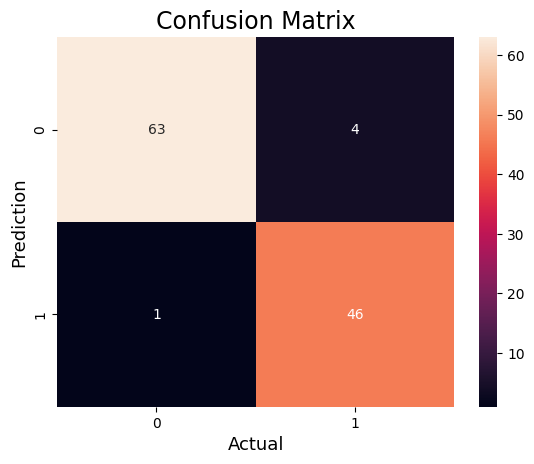

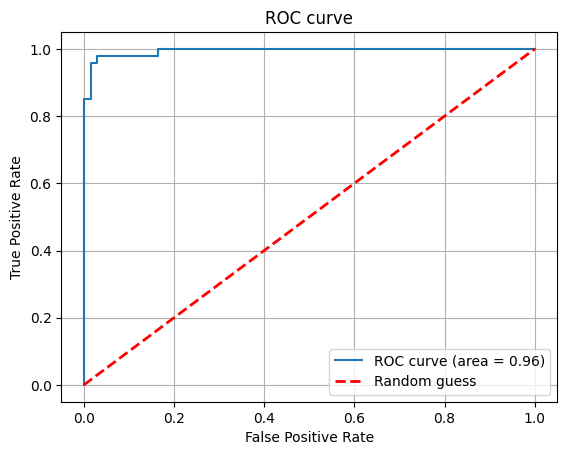

In [ ]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    # roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    # roc_display.figure_.set_size_inches(5,5)
    # plt.plot([0, 1], [0, 1], color = 'g')
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %score)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

dataset = pd.read_csv("https://raw.githubusercontent.com/phattarin-kitbumrung/machinelearning-python/dataset/main/cancer.csv")

# train & test set
dataset = dataset.dropna(how='all', axis=1)
x = dataset.drop(['id', 'diagnosis'], axis=1)
y = dataset['diagnosis']
# dividing dataset in to train test 80% - 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#training
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
cross_validation_score = cross_val_score(model, x, y, cv = KFold(n_splits = 5))
print("Cross Validation Scores: ", cross_validation_score)
print("Average CV Score: ", cross_validation_score.mean())
print("\n")
model.fit(x_train,y_train)

#test
y_pred = model.predict(x_test)

#result
y_pred_proba = model.predict_proba(x_test)
score = model.score(x_test, y_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

#Plot the confusion matrix.
sns.heatmap(cm, annot=True, fmt='g',)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
print("\n")

# Plots the ROC curve using the sklearn methods - Good plot
y_test_format = y_test.replace('B', 0, regex=True)
y_test_format = y_test_format.replace('M', 1, regex=True)
plot_sklearn_roc_curve(y_test_format, y_pred_proba[:, 1])
